# Portugese Bank Marketing

## Import Packages

In [390]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='white')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,roc_curve,precision_score,recall_score,confusion_matrix,precision_recall_curve
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,RobustScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Import Data

In [391]:
#Load dataset
data = pd.read_csv("/Users/disorder/Desktop/CLASS Notes/Python for Data Analysis/group/bank_data/bank.csv", sep = ';', decimal=',')

In [392]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data Exploration

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [394]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [395]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Explanantion of upper cell**

Our dataset does not contain any null values.

In [396]:
print('Shape of our data {}'.format(data.shape))

Shape of our data (4521, 17)


**Explanantion of upper cell**

Our data set has 4521 rows and 17 columns.

In [397]:
# Count of Job, EDUCATION and MARRIAGE
for x in ["marital","job","education"]:
    y=pd.DataFrame(data[x].value_counts().sort_index())
    print(y)

          marital
divorced      528
married      2797
single       1196
               job
admin.         478
blue-collar    946
entrepreneur   168
housemaid      112
management     969
retired        230
self-employed  183
services       417
student         84
technician     768
unemployed     128
unknown         38
           education
primary          678
secondary       2306
tertiary        1350
unknown          187


**Explanantion of upper cell**

- Many levels in job
- 4 levels of Education
- 3 levels of Martial status

In [106]:
# Count of y
data.groupby('y').size()

y
no     4000
yes     521
dtype: int64

**Explanantion of upper cell**

- 4000 no and 521 clients subscribed to a term deposit

## Data Visualization

### Taget Variable

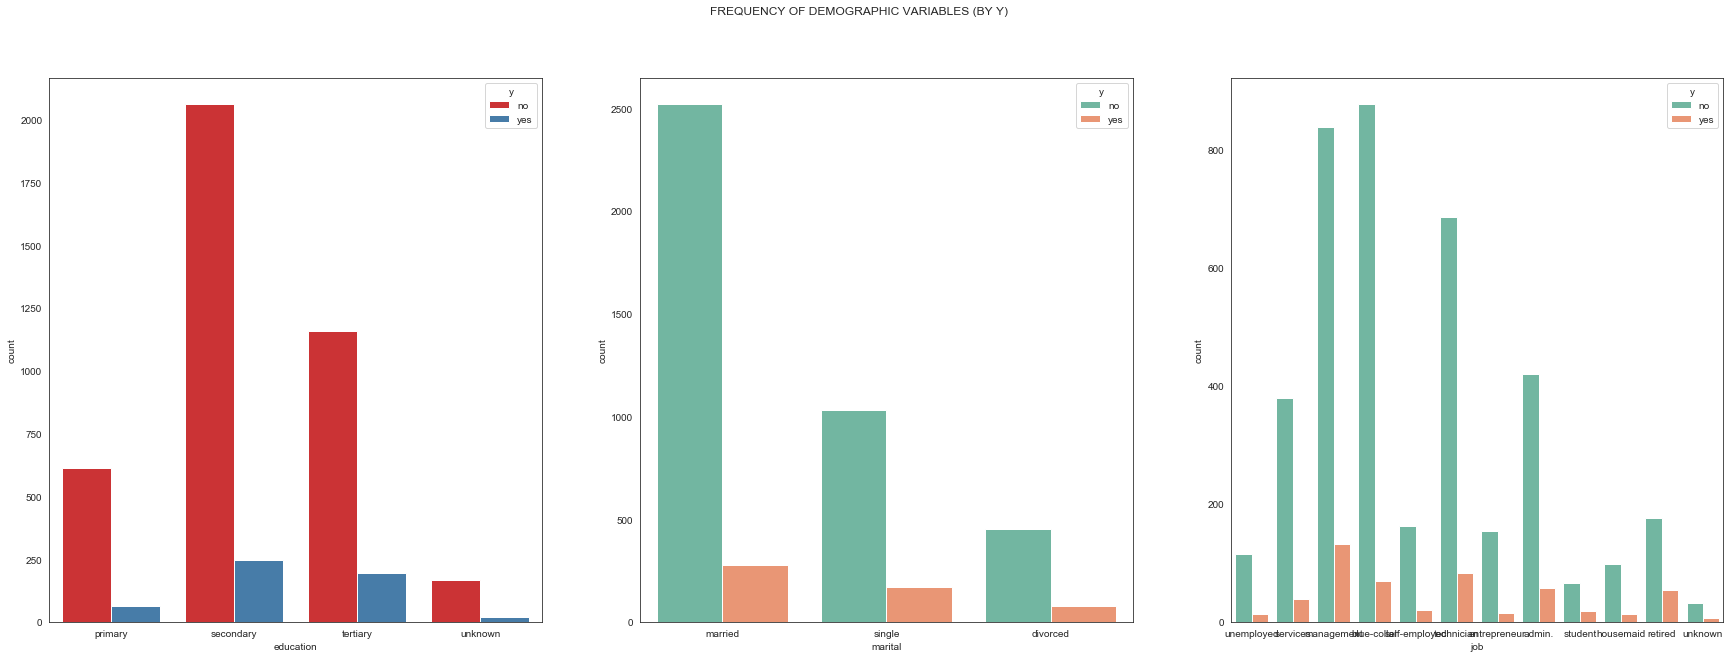

In [398]:
# Count plot: Education, Martial Status, job with target
sns.set_style("white")
subset = data[['education', 'marital', 'job', 'y']]
f, axes = plt.subplots(1, 3, figsize=(30, 10), facecolor='white')
f.suptitle('FREQUENCY OF DEMOGRAPHIC VARIABLES (BY Y)')
ax1 = sns.countplot(x="education", hue="y", data=subset, palette="Set1", ax=axes[0])
ax2 = sns.countplot(x="marital", hue="y", data=subset, palette="Set2",ax=axes[1])
ax3 = sns.countplot(x="job", hue="y", data=subset, palette="Set2",ax=axes[2])
plt.show()

**Explanantion of upper cell**

Observe: 
- **EDUCATION**: More data available for secondary and tertiary education.
- **MARITAL**: More data for married and single.
- **JOB**: Not clear

### Feature Correlation

In [399]:
pd.DataFrame.corr(data)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


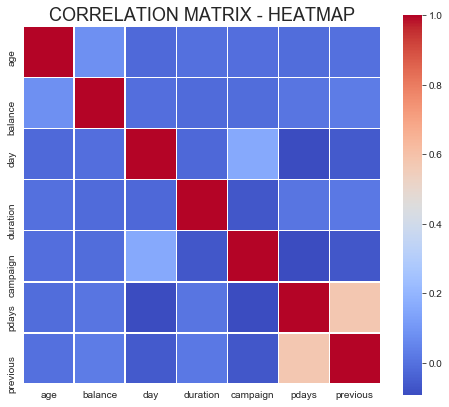

In [400]:
sns.set_style("white")
# By colours
#  Correlations matrix, defined via Pearson function  
corr = data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

Text(0.5, 1.05, 'Pearson correlation of Features')

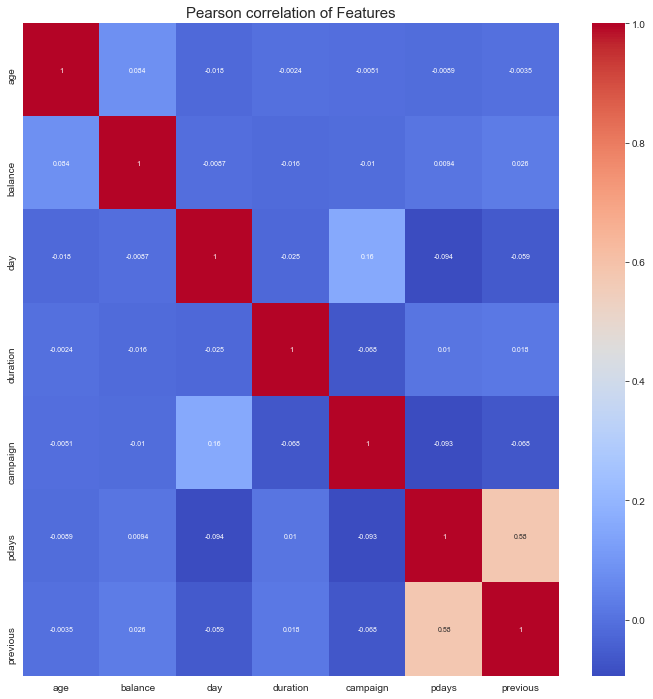

In [401]:
# Correlation Heatmap with annotation
corr = data.corr()

f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr, ax=ax, annot=True, annot_kws={"size": 7}, cmap="coolwarm")

plt.title("Pearson correlation of Features", y=1.05, size=15)

### Check Variation of features variables

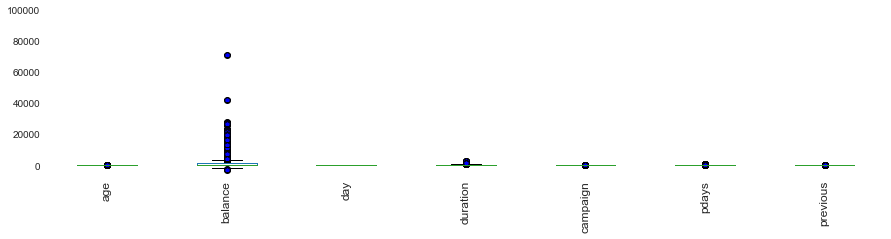

In [402]:
## data are distributed in a wide range (below), need to be normalizded.

features = data.drop(['y'], axis = 1, inplace = False)
plt.figure(figsize=(15,3))
ax= data.drop(['y'], axis=1).boxplot(data.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])
plt.grid(False)
plt.box(False);

We observe that the feature variables variate alot of one another. Standardization is needed for most model.

## Data Cleaning

In [403]:
#changing the y from No/Yes into 0 and 1
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

#changing the data type of the features whose type is object
data['y']=data.y.astype('category')
data['job']=data.job.astype('category')
data['marital']=data.marital.astype('category')
data['education']=data.education.astype('category')
data['default']=data.default.astype('category')
data['housing']=data.housing.astype('category')
data['loan']=data.loan.astype('category')
data['contact']=data.contact.astype('category')
data['month']=data.month.astype('category')
data['poutcome']=data.poutcome.astype('category')

In [404]:
#importing the Encoding library and encoded the categorical data
from sklearn.preprocessing import LabelEncoder
bank_data = data.copy()
labelencoder_X=LabelEncoder()
bank_data['job']=labelencoder_X.fit_transform(bank_data['job'])
bank_data['marital']=labelencoder_X.fit_transform(bank_data['marital'])
bank_data['education']=labelencoder_X.fit_transform(bank_data['education'])
bank_data['default']=labelencoder_X.fit_transform(bank_data['default'])
bank_data['housing']=labelencoder_X.fit_transform(bank_data['housing'])
bank_data['loan']=labelencoder_X.fit_transform(bank_data['loan'])
bank_data['contact']= labelencoder_X.fit_transform(bank_data['contact']) 
bank_data['month']= labelencoder_X.fit_transform(bank_data['month']) 
bank_data['poutcome'] = labelencoder_X.fit_transform(bank_data['poutcome'])

In [405]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   int64   
 2   marital    4521 non-null   int64   
 3   education  4521 non-null   int64   
 4   default    4521 non-null   int64   
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   int64   
 7   loan       4521 non-null   int64   
 8   contact    4521 non-null   int64   
 9   day        4521 non-null   int64   
 10  month      4521 non-null   int64   
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   int64   
 16  y          4521 non-null   category
dtypes: category(1), int64(16)
memory usage: 569.8 KB


In [406]:
bank_data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,1.231365,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,5.540146,263.961292,2.793630,39.766645,0.542579,2.559168
std,10.576211,3.255716,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562,0.992051
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,3.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,3.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000


## Model Building

Preparation for evaluting data:

- Define a function to print confusion matrix called CMatrix
- Storing of performance into a dataframe for each model called metrics

In [407]:
#Function to print a confusion matrix
def CMatrix(CM, labels = ['0', '1']):
    df = pd.DataFrame(data = CM, index = labels, columns = labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df. sum(axis = 1)
    return df

In [408]:
# Dataframe of confusion matrix
metrics = pd.DataFrame (index = ['accuracy','precision','recall'], 
                        columns = ['SVM without scaling(general)', 
                                   'SVM with radial kernel (unscaled) with CV',
                                   'SVM with polynomial kernel (unscaled) with CV',
                                   'SVM with linear kernel (scaled) with CV',
                                   'SVM with polynomial kernel (scaled) with CV',
                                   'SVM with radial kernel (scaled) with CV',
                                   'KNN (scaled) with CV',
                                   'KNN (unscaled) with CV'])

In [409]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### A. SVM without scaling

**SVM Advantages**

- SVM’s are very good when we have no idea on the data.
- Works well with even unstructured and semi structured data like text, Images and trees.
- The kernel trick is real strength of SVM. With an appropriate kernel function, we can solve any complex problem.
- Unlike in neural networks, SVM is not solved for local optima.
- It scales relatively well to high dimensional data.
- SVM models have generalization in practice, the risk of over-fitting is less in SVM.
- SVM is always compared with ANN. When compared to ANN models, SVMs give better results.

**SVM Disadvantages**

- Choosing a “good” kernel function is not easy.
- Long training time for large datasets.
- Difficult to understand and interpret the final model, variable weights and individual impact.
- Since the final model is not so easy to see, we can not do small calibrations to the model hence its tough to incorporate our business logic.
- The SVM hyper parameters are Cost -C and gamma. It is not that easy to fine-tune these hyper-parameters. It is hard to visualize their impact

### 1. SVM without tuning

For SVM, we will do the following Datapreprocessing: 

- Spliting the data into train and test data with 80% and 20% Respectively. 
- Further divide the the train and test data to feature variables and target variable
- Scale the numeric data of the train data using StandardScaler()
- Use the mean and standard deviation of the scaling of numeric train date to scale the test data
- Do oversampling using SMOTE

In [410]:
from sklearn.svm import SVC
#Processing the data first

svmdata = bank_data.copy(deep=True)

#Splitting the data into Train and test
seed = 1
svm_train, svm_test = train_test_split(svmdata, train_size = 0.8, random_state = seed)
svm_train.reset_index(inplace = True, drop = True)
svm_test.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_svm_train = svm_train["y"]
x_svm_train = svm_train.loc[:,svm_train.columns!='y']

y_svm_test = svm_test["y"]
x_svm_test = svm_test.loc[:,svm_test.columns!='y']

columns=x_svm_train.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
svm_X_us,svm_y_us=Ov_sampling.fit_sample(x_svm_train,y_svm_train)
svm_X_us=pd.DataFrame(data=svm_X,columns=columns)
svm_y_us=pd.DataFrame(svm_y,columns=['y'])

#Fit the model
SVM_Model = SVC(gamma='auto', probability=True)
SVM_Model.fit(svm_X_us,svm_y_us)

SVC(gamma='auto', probability=True)

In [411]:
#Evaluate the model
y_pred_svm = SVM_Model.predict(x_svm_test)
metrics.loc['accuracy','SVM without scaling(general)'] = accuracy_score(y_pred = y_pred_svm, y_true = y_svm_test)
metrics.loc['precision','SVM without scaling(general)'] = precision_score(y_pred = y_pred_svm, y_true = y_svm_test)
metrics.loc['recall','SVM without scaling(general)'] = recall_score(y_pred = y_pred_svm, y_true = y_svm_test)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_svm, y_true = y_svm_test)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,789,1,790
1,115,0,115
Total,904,1,905


In [412]:
print(classification_report(y_svm_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       790
           1       0.00      0.00      0.00       115

    accuracy                           0.87       905
   macro avg       0.44      0.50      0.47       905
weighted avg       0.76      0.87      0.81       905



Accuracy Rate: 0.8718232044198895
Misclassification Rate: 0.12817679558011053
Precision Score: 0.0
Recall Score: 0.0


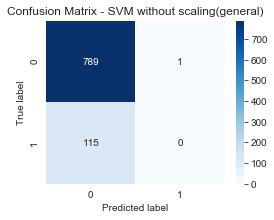

In [413]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_svm, y_true = y_svm_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM without scaling(general)");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_svm, y_true = y_svm_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_svm, y_true = y_svm_test))
print('Precision Score:', precision_score(y_pred = y_pred_svm, y_true = y_svm_test))
print('Recall Score:', recall_score(y_pred = y_pred_svm, y_true = y_svm_test))

AUC: 0.634


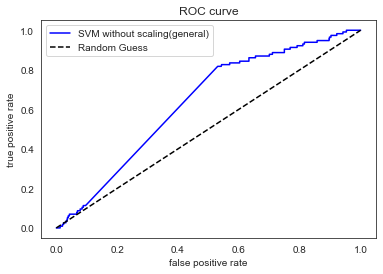

In [416]:
# ROC-AUC

decision_scores = SVM_Model.decision_function(x_svm_test)
fpr, tpr, thres = roc_curve(y_svm_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_svm_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='SVM without scaling(general)')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [417]:
print('length of oversampled data is   ',len(svm_y))

length of oversampled data is    6420


**Result**

According to our accuracy of 87%, our model is quite good. But recall and precision is very low. So, we would not prefer this model.

Precision: 
- Out of all the predicted yes, 0% of them are correctly identified as yes(1).

Recall:
- Out of True yes, o% of them are correctly identified as yes.

### 2. Tuned SVM with 5-Fold CV - Radial Kernel

In [418]:
# Set the parameters by cross-validation
svm_model_rbf = SVC(kernel = "rbf", probability=True)
tuned_parameters_rbf = {'C': [0.001,0.01,0.1,1], "gamma": [0.01,0.1,1,10]}
score_rbf = "accuracy"

print("# Tuning hyper-parameters for accuracy" )
clf_rbf = GridSearchCV(svm_model_rbf, param_grid = tuned_parameters_rbf, scoring=score_rbf , cv = 5)
clf_rbf.fit(svm_X_us,svm_y_us)

means_rbf = clf_rbf.cv_results_['mean_test_score']
stds_rbf = clf_rbf.cv_results_['std_test_score']
for mean, std, params in zip(means_rbf, stds_rbf, clf_rbf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed classification report")
y_true, y_pred_svm_rbf_us = y_svm_test, clf_rbf.predict(x_svm_test)
print(classification_report(y_true, y_pred_rbf_us))

#Evaluate the model
y_pred_svm_rbf_us = clf_rbf.predict(x_svm_test)
metrics.loc['accuracy','SVM with radial kernel (unscaled) with CV'] = accuracy_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)
metrics.loc['precision','SVM with radial kernel (unscaled) with CV'] = precision_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)
metrics.loc['recall','SVM with radial kernel (unscaled) with CV'] = recall_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)
CMatrix(CM)

# Tuning hyper-parameters for accuracy
0.584 (+/-0.103) for {'C': 0.001, 'gamma': 0.01}
0.508 (+/-0.012) for {'C': 0.001, 'gamma': 0.1}
0.506 (+/-0.004) for {'C': 0.001, 'gamma': 1}
0.506 (+/-0.004) for {'C': 0.001, 'gamma': 10}
0.584 (+/-0.103) for {'C': 0.01, 'gamma': 0.01}
0.508 (+/-0.012) for {'C': 0.01, 'gamma': 0.1}
0.506 (+/-0.004) for {'C': 0.01, 'gamma': 1}
0.506 (+/-0.004) for {'C': 0.01, 'gamma': 10}
0.584 (+/-0.103) for {'C': 0.1, 'gamma': 0.01}
0.508 (+/-0.012) for {'C': 0.1, 'gamma': 0.1}
0.506 (+/-0.004) for {'C': 0.1, 'gamma': 1}
0.506 (+/-0.004) for {'C': 0.1, 'gamma': 10}
0.756 (+/-0.045) for {'C': 1, 'gamma': 0.01}
0.621 (+/-0.037) for {'C': 1, 'gamma': 0.1}
0.534 (+/-0.009) for {'C': 1, 'gamma': 1}
0.506 (+/-0.004) for {'C': 1, 'gamma': 10}

Detailed classification report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       790
           1       0.22      0.04      0.07       115

    accuracy                     

PREDICTION,0,1,Total
TRUE,,,
0,772,18,790
1,110,5,115
Total,882,23,905


Accuracy Rate: 0.8585635359116022
Misclassification Rate: 0.14143646408839783
Precision Score: 0.21739130434782608
Recall Score: 0.043478260869565216


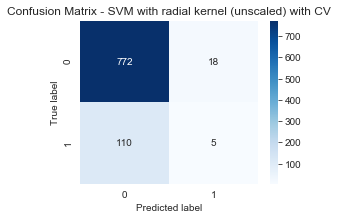

In [419]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM with radial kernel (unscaled) with CV");

y_pred_svm = SVM_Model.predict(x_svm_test)
metrics.loc['accuracy','SVM with radial kernel (unscaled) with CV'] = accuracy_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)
metrics.loc['precision','SVM with radial kernel (unscaled) with CV'] = precision_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)
metrics.loc['recall','SVM with radial kernel (unscaled) with CV'] = recall_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test)

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test))
print('Precision Score:', precision_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test))
print('Recall Score:', recall_score(y_pred = y_pred_svm_rbf_us, y_true = y_svm_test))

AUC: 0.692


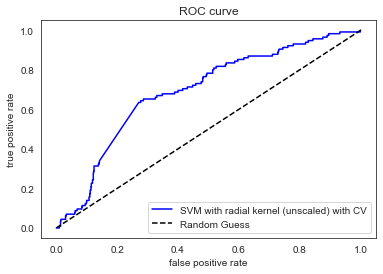

In [420]:
# ROC-AUC

decision_scores = clf_rbf.decision_function(x_svm_test)
fpr, tpr, thres = roc_curve(y_svm_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_svm_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='SVM with radial kernel (unscaled) with CV')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

**Result**

According to our accuracy of 86%, we are doing well in terms of accuracy rate.
Although we have a high precision score of 22%, we have a very low recall score of 4% respectively. The AUC score of 69.2% is also not good.

Precision: 
- Out of all the predicted 1(yes), 22% of them are correctly identified as 1(yes).

Recall:
- Out of True 1, 4% of them are correctly identified as 1.

# 3. Tuned SVM with 5-Fold CV - Polynomial Kernel

In [421]:
# Set the parameters by cross-validation
svm_model_poly = SVC(kernel = "poly",probability=True)
tuned_parameters_poly = {'C': [0.001,0.01,0.1,1], "degree": [2,3,4,5]}
score_poly = "accuracy"

print("# Tuning hyper-parameters for accuracy" )
clf_poly_us = GridSearchCV(svm_model_poly,param_grid = tuned_parameters_poly, scoring=score_poly , cv = 5)
clf_poly_us.fit(svm_X_us,svm_y_us)

means_poly_us = clf_poly_us.cv_results_['mean_test_score']
stds_poly_us = clf_poly_us.cv_results_['std_test_score']
for mean, std, params in zip(means_poly_us, stds_poly_us, clf_poly_us.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed classification report")
y_true_poly, y_pred_svm_poly_us = y_svm_test, clf_poly_us.predict(x_svm_test)
print(classification_report(y_true_poly, y_pred_svm_poly_us))

#Evaluate the model
y_pred_svm_poly_us = clf_poly_us.predict(x_svm_test)
metrics.loc['accuracy','SVM with polynomial kernel (unscaled) with CV'] = accuracy_score(y_pred = y_pred_svm_poly_us, y_true = y_svm_test)
metrics.loc['precision','SVM with polynomial kernel (unscaled) with CV'] = precision_score(y_pred = y_pred_svm_poly_us, y_true = y_svm_test)
metrics.loc['recall','SVM with polynomial kernel (unscaled) with CV'] = recall_score(y_pred = y_pred_svm_poly_us, y_true = y_svm_test)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_svm_poly_us, y_true = y_svm_test)
CMatrix(CM)

# Tuning hyper-parameters for accuracy
0.503 (+/-0.002) for {'C': 0.001, 'degree': 2}
0.506 (+/-0.005) for {'C': 0.001, 'degree': 3}
0.541 (+/-0.058) for {'C': 0.001, 'degree': 4}
0.521 (+/-0.024) for {'C': 0.001, 'degree': 5}
0.583 (+/-0.049) for {'C': 0.01, 'degree': 2}
0.523 (+/-0.003) for {'C': 0.01, 'degree': 3}
0.520 (+/-0.004) for {'C': 0.01, 'degree': 4}
0.516 (+/-0.002) for {'C': 0.01, 'degree': 5}
0.612 (+/-0.014) for {'C': 0.1, 'degree': 2}
0.557 (+/-0.010) for {'C': 0.1, 'degree': 3}
0.525 (+/-0.006) for {'C': 0.1, 'degree': 4}
0.523 (+/-0.004) for {'C': 0.1, 'degree': 5}
0.693 (+/-0.024) for {'C': 1, 'degree': 2}
0.602 (+/-0.016) for {'C': 1, 'degree': 3}
0.554 (+/-0.012) for {'C': 1, 'degree': 4}
0.524 (+/-0.005) for {'C': 1, 'degree': 5}

Detailed classification report
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       790
           1       0.38      0.45      0.41       115

    accuracy                           0.

PREDICTION,0,1,Total
TRUE,,,
0,705,85,790
1,63,52,115
Total,768,137,905


Accuracy Rate: 0.8364640883977901
Misclassification Rate: 0.16353591160220993
Precision Score: 0.3795620437956204
Recall Score: 0.45217391304347826


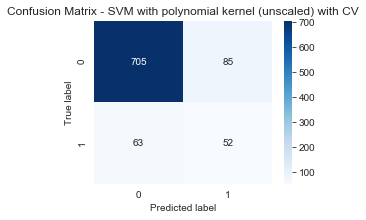

In [422]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_svm_poly_us, y_true = y_svm_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM with polynomial kernel (unscaled) with CV");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_svm_poly_us, y_true = y_svm_test))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_svm_poly_us, y_true = y_svm_test))
print('Precision Score:', precision_score(y_pred = y_pred_svm_poly_us, y_true = y_svm_test))
print('Recall Score:', recall_score(y_pred = y_pred_svm_poly_us, y_true = y_svm_test))

AUC: 0.792


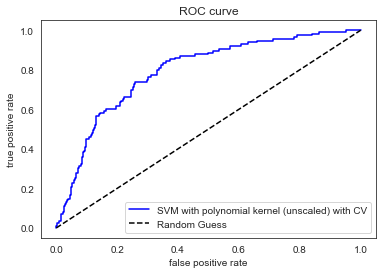

In [423]:
# ROC-AUC

decision_scores = clf_poly_us.decision_function(x_svm_test)
fpr, tpr, thres = roc_curve(y_svm_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_svm_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='SVM with polynomial kernel (unscaled) with CV')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Result

According to our accuracy of 84%, we are doing well in terms of accuracy rate. We have a low precision and recall score of 38% and 45% respectively. The AUC score of 79.2% is good compared to the previous models.

Precision:

Out of all the predicted 1(yes), 38% of them are correctly identified as 1(yes).

Recall:

Out of True 1, 45% of them are correctly identified as 1.

# B. SVM with scaling

In [424]:
bank_data.info()
numcol = ["age", "balance","previous","day","duration","campaign","pdays","previous"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        4521 non-null   int64   
 1   job        4521 non-null   int64   
 2   marital    4521 non-null   int64   
 3   education  4521 non-null   int64   
 4   default    4521 non-null   int64   
 5   balance    4521 non-null   int64   
 6   housing    4521 non-null   int64   
 7   loan       4521 non-null   int64   
 8   contact    4521 non-null   int64   
 9   day        4521 non-null   int64   
 10  month      4521 non-null   int64   
 11  duration   4521 non-null   int64   
 12  campaign   4521 non-null   int64   
 13  pdays      4521 non-null   int64   
 14  previous   4521 non-null   int64   
 15  poutcome   4521 non-null   int64   
 16  y          4521 non-null   category
dtypes: category(1), int64(16)
memory usage: 569.8 KB


# 1. Linear Kernel - SVM(Scaled)

In [425]:
#Processing the data first

svmdatascaled = bank_data.copy(deep=True)

#Splitting the data into Train and test
seed = 1
svm_train_s, svm_test_s = train_test_split(svmdatascaled, train_size = 0.8, random_state = seed)
svm_train_s.reset_index(inplace = True, drop = True)
svm_test_s.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_svm_train_s = svm_train_s["y"]
x_svm_train_s = svm_train_s.loc[:,svm_train_s.columns!='y']

y_svm_test_s = svm_test_s["y"]
x_svm_test_s = svm_test_s.loc[:,svm_test_s.columns!='y']

# Scaling the data
sc = StandardScaler().fit(x_svm_train_s[numcol])
x_svm_train_s[numcol] = sc.fit_transform(x_svm_train_s[numcol])
x_svm_test_s[numcol] = sc.transform(x_svm_test_s[numcol])

columns=x_svm_train_s.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
svm_X_s,svm_y_s=Ov_sampling.fit_sample(x_svm_train_s,y_svm_train_s)
svm_X_s=pd.DataFrame(data=svm_X_s,columns=columns)
svm_y_s=pd.DataFrame(svm_y_s,columns=['y'])

# Set the parameters by cross-validation
svm_model_linear = SVC(kernel = "linear",probability=True)
tuned_parameters_linear = {'C': [0.001, 0.01, 0.1, 1,5,10,100]}
score_linear = "accuracy"

print("# Tuning hyper-parameters for accuracy" )
clf_linear = GridSearchCV(svm_model_linear, param_grid = tuned_parameters_linear, scoring=score_linear , cv = 5)
clf_linear.fit(svm_X_s, svm_y_s)

means_linear = clf_linear.cv_results_['mean_test_score']
stds_linear = clf_linear.cv_results_['std_test_score']
for mean, std, params in zip(means_linear, stds_linear, clf_linear.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed classification report")
y_true_s, y_pred_s = y_svm_test_s, clf_linear.predict(x_svm_test_s)
print(classification_report(y_pred = y_pred_s,  y_true = y_true_s))

# Tuning hyper-parameters for accuracy
0.815 (+/-0.023) for {'C': 0.001}
0.844 (+/-0.037) for {'C': 0.01}
0.844 (+/-0.043) for {'C': 0.1}
0.842 (+/-0.046) for {'C': 1}
0.843 (+/-0.046) for {'C': 5}
0.843 (+/-0.046) for {'C': 10}
0.842 (+/-0.047) for {'C': 100}

Detailed classification report
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       790
           1       0.35      0.72      0.47       115

    accuracy                           0.79       905
   macro avg       0.65      0.76      0.67       905
weighted avg       0.88      0.79      0.82       905



In [426]:
#Evaluate the model
metrics.loc['accuracy','SVM with linear kernel (scaled) with CV'] = accuracy_score(y_pred = y_pred_s,  y_true = y_true_s)
metrics.loc['precision','SVM with linear kernel (scaled) with CV'] = precision_score(y_pred = y_pred_s,  y_true = y_true_s)
metrics.loc['recall','SVM with linear kernel (scaled) with CV'] = recall_score(y_pred = y_pred_s,  y_true = y_true_s)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_s,  y_true = y_true_s)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,635,155,790
1,32,83,115
Total,667,238,905


Accuracy Rate: 0.7933701657458564
Misclassification Rate: 0.2066298342541436
Precision Score: 0.3487394957983193
Recall Score: 0.7217391304347827


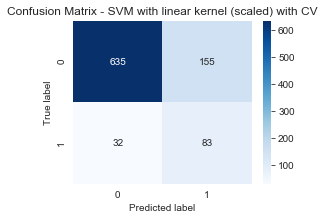

In [427]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_s,  y_true = y_true_s)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM with linear kernel (scaled) with CV");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_s,  y_true = y_true_s))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_s,  y_true = y_true_s))
print('Precision Score:', precision_score(y_pred = y_pred_s,  y_true = y_true_s))
print('Recall Score:', recall_score(y_pred = y_pred_s,  y_true = y_true_s))

AUC: 0.834


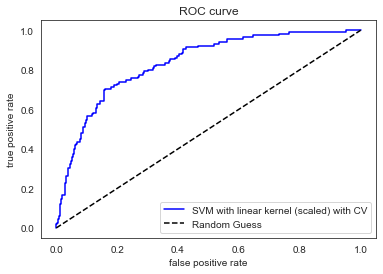

In [428]:
# ROC-AUC

decision_scores = clf_linear.decision_function(x_svm_test_s)
fpr, tpr, thres = roc_curve(y_svm_test_s, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_svm_test_s, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='SVM with linear kernel (scaled) with CV')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Result

According to our accuracy of 79%, we are doing not well in terms of accuracy rate. We have a low precision score of 35% but we have a high recall score of 72% which is the highest amongst SVM. The AUC score of 83.4% is also very good and the highest amongst various variation of SVM.

Precision:

Out of all the predicted 1(yes), 35% of them are correctly identified as 1(yes).

Recall:

Out of True 1, 72% of them are correctly identified as 1.

# 2. Polynomial Kernel - SVM(Scaled)

In [429]:
# Set the parameters by cross-validation
svm_model_poly_s = SVC(kernel = "poly", probability=True)
tuned_parameters_poly_s = {'C': [0.001,0.01,0.1,1], "degree": [2,3,4,5]}
score_poly_s = "accuracy"

#Tuning the parameters
print("# Tuning hyper-parameters for accuracy" )
clf_poly_s = GridSearchCV(svm_model_poly_s, param_grid = tuned_parameters_poly_s, scoring=score_poly_s , cv = 5)
clf_poly_s.fit(svm_X_s, svm_y_s)

means_poly_s = clf_poly_s.cv_results_['mean_test_score']
stds_poly_s = clf_poly_s.cv_results_['std_test_score']
for mean, std, params in zip(means_poly_s, stds_poly_s, clf_poly_s.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed classification report")
y_true_poly_s, y_pred_poly_s = y_svm_test_s, clf_poly_s.predict(x_svm_test_s)
print(classification_report(y_true_poly_s, y_pred_poly_s))

# Tuning hyper-parameters for accuracy
0.669 (+/-0.043) for {'C': 0.001, 'degree': 2}
0.621 (+/-0.068) for {'C': 0.001, 'degree': 3}
0.601 (+/-0.042) for {'C': 0.001, 'degree': 4}
0.631 (+/-0.047) for {'C': 0.001, 'degree': 5}
0.759 (+/-0.029) for {'C': 0.01, 'degree': 2}
0.747 (+/-0.028) for {'C': 0.01, 'degree': 3}
0.743 (+/-0.020) for {'C': 0.01, 'degree': 4}
0.730 (+/-0.021) for {'C': 0.01, 'degree': 5}
0.823 (+/-0.024) for {'C': 0.1, 'degree': 2}
0.803 (+/-0.028) for {'C': 0.1, 'degree': 3}
0.790 (+/-0.024) for {'C': 0.1, 'degree': 4}
0.779 (+/-0.021) for {'C': 0.1, 'degree': 5}
0.849 (+/-0.033) for {'C': 1, 'degree': 2}
0.845 (+/-0.023) for {'C': 1, 'degree': 3}
0.829 (+/-0.028) for {'C': 1, 'degree': 4}
0.815 (+/-0.032) for {'C': 1, 'degree': 5}

Detailed classification report
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       790
           1       0.36      0.72      0.48       115

    accuracy                           0.

In [430]:
#Evaluate the model
metrics.loc['accuracy','SVM with polynomial kernel (scaled) with CV'] = accuracy_score(y_pred = y_pred_poly_s, y_true = y_true_poly_s)
metrics.loc['precision','SVM with polynomial kernel (scaled) with CV'] = precision_score(y_pred = y_pred_poly_s, y_true = y_true_poly_s)
metrics.loc['recall','SVM with polynomial kernel (scaled) with CV'] = recall_score(y_pred = y_pred_poly_s, y_true = y_true_poly_s)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_poly_s, y_true = y_true_poly_s)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,641,149,790
1,32,83,115
Total,673,232,905


Accuracy Rate: 0.8
Misclassification Rate: 0.19999999999999996
Precision Score: 0.3577586206896552
Recall Score: 0.7217391304347827


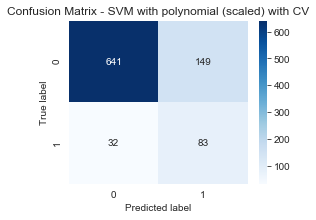

In [431]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_poly_s, y_true = y_true_poly_s)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM with polynomial (scaled) with CV");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_poly_s, y_true = y_true_poly_s))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_poly_s, y_true = y_true_poly_s))
print('Precision Score:', precision_score(y_pred = y_pred_poly_s, y_true = y_true_poly_s))
print('Recall Score:', recall_score(y_pred = y_pred_poly_s, y_true = y_true_poly_s))

AUC: 0.833


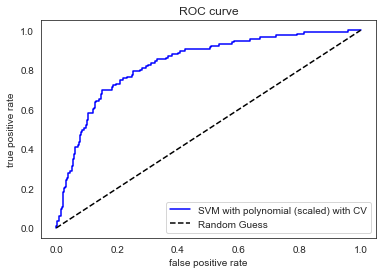

In [432]:
# ROC-AUC

decision_scores = clf_poly_s.decision_function(x_svm_test_s)
fpr, tpr, thres = roc_curve(y_svm_test_s, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_svm_test_s, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='SVM with polynomial (scaled) with CV')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Result

According to our accuracy of 80%, we are doing well in terms of accuracy rate. We have a low precision score of 35% but we have a high recall score of 72% which is the highest amongst SVM and is very similar to the linear kernel. The AUC score of 83.3% is also very good and one of the highest amongst various variation of SVM.

Precision:

Out of all the predicted 1(yes), 35% of them are correctly identified as 1(yes).

Recall:

Out of True 1, 72% of them are correctly identified as 1.

# 3. Radial Kernel - SVM(Scaled)

In [433]:
# Set the parameters by cross-validation
svm_model_rbf_s = SVC(kernel = "rbf", probability=True)
tuned_parameters_rbf_s = {'C': [0.001,0.01,0.1,1], "gamma": [0.01,0.1,1,10]}
score_rbf_s = "accuracy"

print("# Tuning hyper-parameters for accuracy" )
clf_rbf_s = GridSearchCV(svm_model_rbf_s, param_grid = tuned_parameters_rbf_s, scoring=score_rbf_s , cv = 5)
clf_rbf_s.fit(svm_X_s, svm_y_s)

means_rbf_s = clf_rbf_s.cv_results_['mean_test_score']
stds_rbf_s = clf_rbf_s.cv_results_['std_test_score']
for mean, std, params in zip(means_rbf_s, stds_rbf_s, clf_rbf_s.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed classification report")
y_true_rbf_s, y_pred_rbf_s = y_svm_test_s, clf_rbf_s.predict(x_svm_test_s)
print(classification_report(y_true_rbf_s, y_pred_rbf_s))

# Tuning hyper-parameters for accuracy
0.670 (+/-0.039) for {'C': 0.001, 'gamma': 0.01}
0.698 (+/-0.025) for {'C': 0.001, 'gamma': 0.1}
0.777 (+/-0.267) for {'C': 0.001, 'gamma': 1}
0.581 (+/-0.026) for {'C': 0.001, 'gamma': 10}
0.720 (+/-0.042) for {'C': 0.01, 'gamma': 0.01}
0.724 (+/-0.018) for {'C': 0.01, 'gamma': 0.1}
0.777 (+/-0.267) for {'C': 0.01, 'gamma': 1}
0.581 (+/-0.026) for {'C': 0.01, 'gamma': 10}
0.827 (+/-0.025) for {'C': 0.1, 'gamma': 0.01}
0.867 (+/-0.013) for {'C': 0.1, 'gamma': 0.1}
0.816 (+/-0.136) for {'C': 0.1, 'gamma': 1}
0.581 (+/-0.026) for {'C': 0.1, 'gamma': 10}
0.864 (+/-0.031) for {'C': 1, 'gamma': 0.01}
0.932 (+/-0.020) for {'C': 1, 'gamma': 0.1}
0.942 (+/-0.037) for {'C': 1, 'gamma': 1}
0.769 (+/-0.054) for {'C': 1, 'gamma': 10}

Detailed classification report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       790
           1       0.32      0.05      0.09       115

    accuracy                     

In [434]:
#Evaluate the model
metrics.loc['accuracy','SVM with radial kernel (scaled) with CV'] = accuracy_score(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s)
metrics.loc['precision','SVM with radial kernel (scaled) with CV'] = precision_score(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s)
metrics.loc['recall','SVM with radial kernel (scaled) with CV'] = recall_score(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,777,13,790
1,109,6,115
Total,886,19,905


Accuracy Rate: 0.8651933701657458
Misclassification Rate: 0.13480662983425418
Precision Score: 0.3157894736842105
Recall Score: 0.05217391304347826


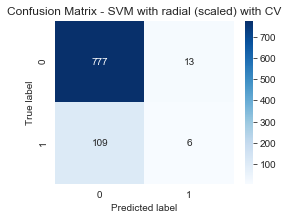

In [435]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM with radial (scaled) with CV");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s))
print('Precision Score:', precision_score(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s))
print('Recall Score:', recall_score(y_pred = y_pred_rbf_s, y_true = y_true_rbf_s))

AUC: 0.805


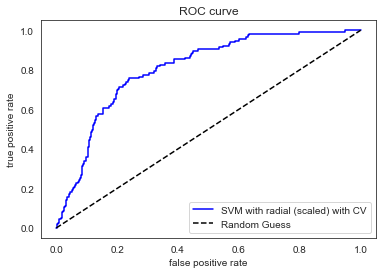

In [436]:
# ROC-AUC

decision_scores = clf_rbf_s.decision_function(x_svm_test_s)
fpr, tpr, thres = roc_curve(y_svm_test_s, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_svm_test_s, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='SVM with radial (scaled) with CV')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Result

According to our accuracy of 86.5%, we are doing well in terms of accuracy rate. We have a low precision score of 31.6% and a very low recall score of 5% which is very low. The AUC score of 80.5% is good but not the best.

Precision:

Out of all the predicted 1(yes), 31.6% of them are correctly identified as 1(yes).

Recall:

Out of True 1, 5% of them are correctly identified as 1.

# C. KNN

# 1. KNN after scaling

Text(0, 0.5, 'ErrTe')

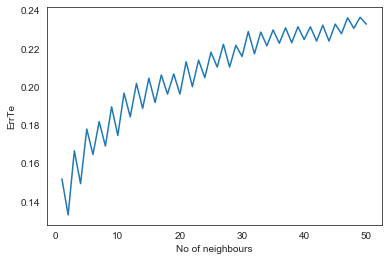

In [437]:
# Find the optimal K

KNNdata = bank_data.copy(deep=True)

#Splitting the data into Train and test
seed = 1
knn_train, knn_test = train_test_split(KNNdata, train_size = 0.8, random_state = seed)
knn_train.reset_index(inplace = True, drop = True)
knn_test.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_knn_train = knn_train["y"]
x_knn_train = knn_train.loc[:,knn_train.columns!='y']

y_knn_test = knn_test["y"]
x_knn_test = knn_test.loc[:,knn_test.columns!='y']

columns=x_knn_train.columns


from sklearn.model_selection import KFold
kf = KFold(10, random_state = 1, shuffle = True)
kf.get_n_splits(x_knn_train)

import numpy as np
import random
random.seed(1)
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

direction = y_knn_train
# Cross validation
Kmax = 50
ErrCV = np.zeros((50, 10))
f = 0
for train_idx, test_idx in kf.split(x_knn_train):
    
    #Split into pseudo training/test data
    X_train_knn, y_train_knn = x_knn_train.loc[train_idx, :], direction[train_idx]
    X_test_knn, y_test_knn = x_knn_train.loc[test_idx, :], direction[test_idx]
    
    #scale the pseudo train and test data
    sc = StandardScaler()
    X_train_knn[numcol] = sc.fit_transform(X_train_knn[numcol])
    X_test_knn[numcol] = sc.transform(X_test_knn[numcol])
    
    #balance the scaled pseudo and training data
    Ov_sampling_knn = SMOTE(random_state=100)
    ov_data_X_knn , ov_data_y_knn = Ov_sampling_knn.fit_sample(X_train_knn , y_train_knn)
    ov_data_X_knn=pd.DataFrame(data=ov_data_X_knn ,columns=columns)
    ov_data_y_knn =pd.DataFrame(ov_data_y_knn ,columns=['y'])
    
    
    for kk in range(1, Kmax+1):
        kNN_s = KNeighborsClassifier(n_neighbors=kk)
        kNN_s.fit(ov_data_X_knn,ov_data_y_knn)
        y_pred_knn = kNN_s.predict(X_test_knn)
        ErrCV[kk-1, f] = (y_pred_knn != y_test_knn).mean()
        
    f += 1

# Plot average CV error
sns.lineplot(x = np.arange(1, Kmax+1), y = ErrCV.mean(axis = 1))
plt.xlabel("No of neighbours")
plt.ylabel("ErrTe")

In [438]:
print("No of neighbours:", np.argmin(ErrCV.mean(axis = 1))+1)

No of neighbours: 2


In [439]:
# dividing it into xtrain and ytrain
y_knn_train_s = knn_train["y"]
x_knn_train_s = knn_train.loc[:,knn_train.columns!='y']

y_knn_test_s = knn_test["y"]
x_knn_test_s = knn_test.loc[:,knn_test.columns!='y']

columns=x_knn_train.columns
# Scaling the data
sc = StandardScaler().fit(x_knn_train_s[numcol])
x_knn_train_s[numcol] = sc.fit_transform(x_knn_train_s[numcol])
x_knn_test_s[numcol] = sc.transform(x_knn_test_s[numcol])

columns=x_knn_train_s.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
knn_X_s,knn_y_s=Ov_sampling.fit_sample(x_knn_train_s,y_knn_train_s)
knn_X_s=pd.DataFrame(data=knn_X_s,columns=columns)
knn_y_s=pd.DataFrame(knn_y_s,columns=['y'])

#fit the model to the whole dataset
seed = 1
kNN_sc = KNeighborsClassifier(n_neighbors=2)
kNN_sc.fit(knn_X_s, knn_y_s)
y_true_knn_s, y_pred_knn_s = y_knn_test_s, kNN_sc.predict(x_knn_test_s)
confusion_matrix(y_true_knn_s, y_pred_knn_s)

array([[720,  70],
       [ 71,  44]])

In [440]:
print("Detailed classification report")
y_true_knn_s, y_pred_knn_s = y_knn_test_s, kNN_sc.predict(x_knn_test_s)
print(classification_report(y_true_knn_s, y_pred_knn_s))

Detailed classification report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       790
           1       0.39      0.38      0.38       115

    accuracy                           0.84       905
   macro avg       0.65      0.65      0.65       905
weighted avg       0.84      0.84      0.84       905



In [441]:
#Evaluate the model
metrics.loc['accuracy','KNN (scaled) with CV'] = accuracy_score(y_pred = y_pred_knn_s, y_true = y_true_knn_s)
metrics.loc['precision','KNN (scaled) with CV'] = precision_score(y_pred = y_pred_knn_s, y_true = y_true_knn_s)
metrics.loc['recall','KNN (scaled) with CV'] = recall_score(y_pred = y_pred_knn_s, y_true = y_true_knn_s)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_knn_s, y_true = y_true_knn_s)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,720,70,790
1,71,44,115
Total,791,114,905


Accuracy Rate: 0.8441988950276244
Misclassification Rate: 0.15580110497237565
Precision Score: 0.38596491228070173
Recall Score: 0.3826086956521739


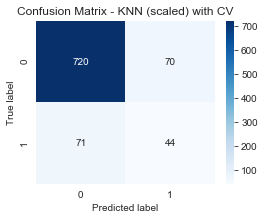

In [442]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_knn_s, y_true = y_true_knn_s)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN (scaled) with CV");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_knn_s, y_true = y_true_knn_s))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_knn_s, y_true = y_true_knn_s))
print('Precision Score:', precision_score(y_pred = y_pred_knn_s, y_true = y_true_knn_s))
print('Recall Score:', recall_score(y_pred = y_pred_knn_s, y_true = y_true_knn_s))

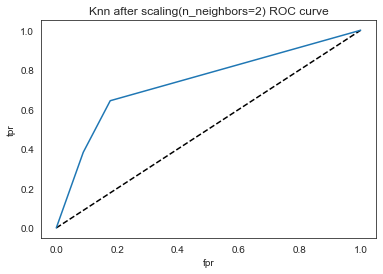

0.7385250412768298

In [443]:
y_pred_proba = kNN_sc.predict_proba(x_knn_test_s)[:,1]
fpr, tpr, thresholds = roc_curve(y_true_knn_s, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn after scaling')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn after scaling(n_neighbors=2) ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true_knn_s,y_pred_proba)

Result

According to our accuracy of 84.4%, we are doing well in terms of accuracy rate. We have a low precision score of 38.5% but it is the highest between SVM and KNN and a very low recall score of 38.2% which is also very low. The AUC score of 73.85% is moderately good.

Precision:

Out of all the predicted 1(yes), 38.5% of them are correctly identified as 1(yes).

Recall:

Out of True 1, 38.2% of them are correctly identified as 1.

# 2. KNN before scaling

Text(0, 0.5, 'ErrTe')

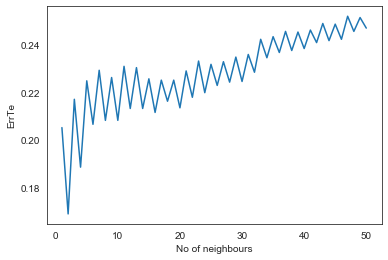

In [444]:
# Find the optimal K

KNNdata = bank_data.copy(deep=True)

#Splitting the data into Train and test
seed = 1
knn_train, knn_test = train_test_split(KNNdata, train_size = 0.8, random_state = seed)
knn_train.reset_index(inplace = True, drop = True)
knn_test.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_knn_train = knn_train["y"]
x_knn_train = knn_train.loc[:,knn_train.columns!='y']

y_knn_test = knn_test["y"]
x_knn_test = knn_test.loc[:,knn_test.columns!='y']

columns=x_knn_train.columns


from sklearn.model_selection import KFold
kf = KFold(10, random_state = 1, shuffle = True)
kf.get_n_splits(x_knn_train)

import numpy as np
import random
random.seed(1)
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

direction = y_knn_train
# Cross validation
Kmax = 50
ErrCV = np.zeros((50, 10))
f = 0
for train_idx, test_idx in kf.split(x_knn_train):
    
    #Split into pseudo training/test data
    X_train_knn, y_train_knn = x_knn_train.loc[train_idx, :], direction[train_idx]
    X_test_knn, y_test_knn = x_knn_train.loc[test_idx, :], direction[test_idx]
    
    #balance the scaled pseudo and training data
    Ov_sampling_knn = SMOTE(random_state=100)
    ov_data_X_knn , ov_data_y_knn = Ov_sampling_knn.fit_sample(X_train_knn , y_train_knn)
    ov_data_X_knn=pd.DataFrame(data=ov_data_X_knn ,columns=columns)
    ov_data_y_knn =pd.DataFrame(ov_data_y_knn ,columns=['y'])
    
    
    for kk in range(1, Kmax+1):
        kNN_usc = KNeighborsClassifier(n_neighbors=kk)
        kNN_usc.fit(ov_data_X_knn,ov_data_y_knn)
        y_pred_knn = kNN_usc.predict(X_test_knn)
        ErrCV[kk-1, f] = (y_pred_knn != y_test_knn).mean()
        
    f += 1

# Plot average CV error
sns.lineplot(x = np.arange(1, Kmax+1), y = ErrCV.mean(axis = 1))
plt.xlabel("No of neighbours")
plt.ylabel("ErrTe")

In [445]:
print("No of neighbours:", np.argmin(ErrCV.mean(axis = 1))+1)

No of neighbours: 2


In [446]:
# dividing it into xtrain and ytrain
y_knn_train_us = knn_train["y"]
x_knn_train_us = knn_train.loc[:,knn_train.columns!='y']

y_knn_test_us = knn_test["y"]
x_knn_test_us = knn_test.loc[:,knn_test.columns!='y']

columns=x_knn_train_us.columns

#Balancing the data - import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE
Ov_sampling=SMOTE(random_state=100)
knn_X_us,knn_y_us=Ov_sampling.fit_sample(x_knn_train_us,y_knn_train_us)
knn_X_us=pd.DataFrame(data=knn_X_us,columns=columns)
knn_y_us=pd.DataFrame(knn_y_us,columns=['y'])

#fit the model to the whole dataset
seed = 1
kNN_s_f = KNeighborsClassifier(n_neighbors=2)
kNN_s_f.fit(knn_X_us, knn_y_us)
y_true_knn_us, y_pred_knn_us = y_knn_test_us, kNN_s_f.predict(x_knn_test_us)
confusion_matrix(y_true_knn_us, y_pred_knn_us)

array([[690, 100],
       [ 72,  43]])

In [447]:
print("Detailed classification report")
y_true_knn_us, y_pred_knn_us = y_knn_test_us, kNN_s_f.predict(x_knn_test_us)
print(classification_report(y_true_knn_us, y_pred_knn_us))

Detailed classification report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       790
           1       0.30      0.37      0.33       115

    accuracy                           0.81       905
   macro avg       0.60      0.62      0.61       905
weighted avg       0.83      0.81      0.82       905



In [448]:
#Evaluate the model
metrics.loc['accuracy','KNN (unscaled) with CV'] = accuracy_score(y_pred = y_pred_knn_us, y_true = y_true_knn_us)
metrics.loc['precision','KNN (unscaled) with CV'] = precision_score(y_pred = y_pred_knn_us, y_true = y_true_knn_us)
metrics.loc['recall','KNN (unscaled) with CV'] = recall_score(y_pred = y_pred_knn_us, y_true = y_true_knn_us)

#Confusion Matrix
CM = confusion_matrix(y_pred = y_pred_knn_us, y_true = y_true_knn_us)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,690,100,790
1,72,43,115
Total,762,143,905


Accuracy Rate: 0.8099447513812155
Misclassification Rate: 0.19005524861878453
Precision Score: 0.3006993006993007
Recall Score: 0.3739130434782609


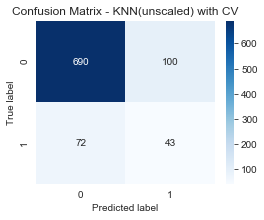

In [449]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_knn_us, y_true = y_true_knn_us)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN(unscaled) with CV");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_knn_us, y_true = y_true_knn_us))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_knn_us, y_true = y_true_knn_us))
print('Precision Score:', precision_score(y_pred = y_pred_knn_us, y_true = y_true_knn_us))
print('Recall Score:', recall_score(y_pred = y_pred_knn_us, y_true = y_true_knn_us))

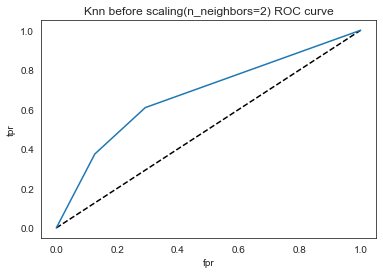

0.6742872867363787

In [450]:
y_pred_proba = kNN_s_f.predict_proba(x_knn_test_us)[:,1]
fpr, tpr, thresholds = roc_curve(y_true_knn_us, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn before scaling')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn before scaling(n_neighbors=2) ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true_knn_us,y_pred_proba)

Result

According to our accuracy of 81%, we are doing well in terms of accuracy rate. We have a low precision score of 30.06% and a very low recall score of 37.39%. The AUC score of 67.42% is one of the lowest.

Precision:

Out of all the predicted 1(yes), 30.06% of them are correctly identified as 1(yes).

Recall:

Out of True 1, 37.9% of them are correctly identified as 1.

# Evaluating models

In [451]:
100*metrics

,SVM without scaling(general),SVM with radial kernel (unscaled) with CV,SVM with polynomial kernel (unscaled) with CV,SVM with linear kernel (scaled) with CV,SVM with polynomial kernel (scaled) with CV,SVM with radial kernel (scaled) with CV,KNN (scaled) with CV,KNN (unscaled) with CV
accuracy,87.1823,85.8564,83.6464,79.337,80,86.5193,84.4199,80.9945
precision,0,21.7391,37.9562,34.8739,35.7759,31.5789,38.5965,30.0699
recall,0,4.34783,45.2174,72.1739,72.1739,5.21739,38.2609,37.3913


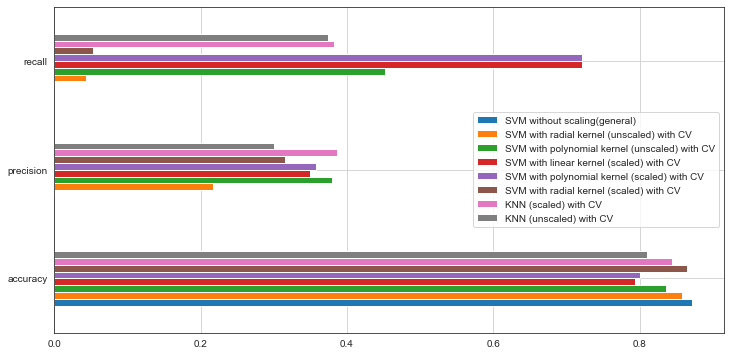

In [452]:
fig, ax = plt.subplots(figsize = (12,6))
metrics.plot(kind = 'barh', ax = ax)
ax.grid()

In [453]:
metrics

,SVM without scaling(general),SVM with radial kernel (unscaled) with CV,SVM with polynomial kernel (unscaled) with CV,SVM with linear kernel (scaled) with CV,SVM with polynomial kernel (scaled) with CV,SVM with radial kernel (scaled) with CV,KNN (scaled) with CV,KNN (unscaled) with CV
accuracy,0.871823,0.858564,0.836464,0.79337,0.8,0.865193,0.844199,0.809945
precision,0,0.217391,0.379562,0.348739,0.357759,0.315789,0.385965,0.300699
recall,0,0.0434783,0.452174,0.721739,0.721739,0.0521739,0.382609,0.373913


If we consider accuracy then SVM without scaling is the best. If we consider recall then SVM with linear/polynomial kernel(scaled) with CV is a good model. But if we consider precision, then KNN(scaled) with CV is the highest amongst SVM and KNN.

Categorical datas can also be handled by using "get dummies" in python. 

# With Dummies

In [454]:
# Creating dummy variables for categorical types
import pandas as pd
cat_cols = ["job",'marital','education','default','housing','loan','contact','month','poutcome']
num_cols = ["age", "balance","previous","day","duration","campaign","pdays","previous"]
dummies = pd.get_dummies(data[cat_cols])
dummies.head(5)

# Combining dummy variables and numeric varianbles
dataset1 = data[num_cols]

dataset2 = pd.concat([dataset1, dummies, data["y"]], axis=1)
dataset = dataset2.copy(deep=True)

dataset.shape
dataset.head(5)

,age,balance,previous,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,30,1787,0,19,79,1,-1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,33,4789,4,11,220,1,339,4,0,0,...,0,1,0,0,0,1,0,0,0,0
2,35,1350,1,16,185,1,330,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,1476,0,3,199,4,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,59,0,0,5,226,1,-1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [455]:
metrics1 = pd.DataFrame (index = ['accuracy','precision','recall'], 
                        columns = ['SVM with polynomial kernel (with dummy) with CV'])

In [456]:
#Processing the data first

svmdatadummy = dataset.copy(deep=True)

#Splitting the data into Train and test
seed = 1
svm_train_ds, svm_test_ds = train_test_split(svmdatadummy, train_size = 0.8, random_state = seed)
svm_train_ds.reset_index(inplace = True, drop = True)
svm_test_ds.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_svm_train_ds = svm_train_ds["y"]
x_svm_train_ds = svm_train_ds.loc[:,svm_train_ds.columns!='y']

y_svm_test_ds = svm_test_ds["y"]
x_svm_test_ds = svm_test_ds.loc[:,svm_test_ds.columns!='y']

# Scaling the data
sc = StandardScaler().fit(x_svm_train_ds[num_cols])
x_svm_train_ds[num_cols] = sc.fit_transform(x_svm_train_ds[num_cols])
x_svm_test_ds[num_cols] = sc.transform(x_svm_test_ds[num_cols])

In [457]:
# Set the parameters by cross-validation
svm_model_poly_ds = SVC(kernel = "poly",probability=True)
tuned_parameters_poly_ds = {'C': [0.001,0.01,0.1,1], "degree": [2,3,4,5]}
score_poly_ds = "accuracy"

columns_ds = x_svm_train_ds.columns

#Tuning the parameters
print("# Tuning hyper-parameters for accuracy" )
clf_poly_ds = GridSearchCV(svm_model_poly_ds, param_grid = tuned_parameters_poly_ds, scoring=score_poly_ds , cv = 5)
clf_poly_ds.fit(x_svm_train_ds, y_svm_train_ds)

means_poly_ds = clf_poly_ds.cv_results_['mean_test_score']
stds_poly_ds = clf_poly_ds.cv_results_['std_test_score']
for mean, std, params in zip(means_poly_ds, stds_poly_ds, clf_poly_ds.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))
print()
print("Detailed classification report")
y_true_poly_ds, y_pred_poly_ds = y_svm_test_ds, clf_poly_ds.predict(x_svm_test_ds)
print(classification_report(y_true_poly_ds, y_pred_poly_ds))

# Tuning hyper-parameters for accuracy
0.888 (+/-0.001) for {'C': 0.001, 'degree': 2}
0.888 (+/-0.001) for {'C': 0.001, 'degree': 3}
0.887 (+/-0.002) for {'C': 0.001, 'degree': 4}
0.887 (+/-0.004) for {'C': 0.001, 'degree': 5}
0.888 (+/-0.001) for {'C': 0.01, 'degree': 2}
0.887 (+/-0.003) for {'C': 0.01, 'degree': 3}
0.887 (+/-0.005) for {'C': 0.01, 'degree': 4}
0.886 (+/-0.010) for {'C': 0.01, 'degree': 5}
0.889 (+/-0.005) for {'C': 0.1, 'degree': 2}
0.889 (+/-0.006) for {'C': 0.1, 'degree': 3}
0.890 (+/-0.005) for {'C': 0.1, 'degree': 4}
0.890 (+/-0.005) for {'C': 0.1, 'degree': 5}
0.902 (+/-0.010) for {'C': 1, 'degree': 2}
0.899 (+/-0.007) for {'C': 1, 'degree': 3}
0.899 (+/-0.011) for {'C': 1, 'degree': 4}
0.896 (+/-0.010) for {'C': 1, 'degree': 5}

Detailed classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       790
           1       0.60      0.21      0.31       115

    accuracy                           0.

In [458]:
#Evaluate the model
metrics1.loc['accuracy','SVM with polynomial kernel (with dummy) with CV'] = accuracy_score(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds)
metrics1.loc['precision','SVM with polynomial kernel (with dummy) with CV'] = precision_score(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds)
metrics1.loc['recall','SVM with polynomial kernel (with dummy) with CV'] = recall_score(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds)

#Confusion Matrix
CM = confusion_matrix(y_pred =  y_pred_poly_ds, y_true = y_true_poly_ds)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,774,16,790
1,91,24,115
Total,865,40,905


Accuracy Rate: 0.881767955801105
Misclassification Rate: 0.11823204419889499
Precision Score: 0.6
Recall Score: 0.20869565217391303


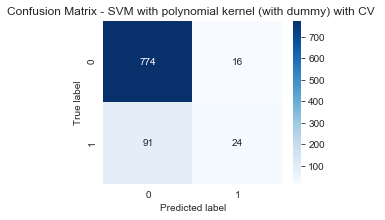

In [459]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - SVM with polynomial kernel (with dummy) with CV ");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds))
print('Precision Score:', precision_score(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds))
print('Recall Score:', recall_score(y_pred = y_pred_poly_ds, y_true = y_true_poly_ds))

AUC: 0.865


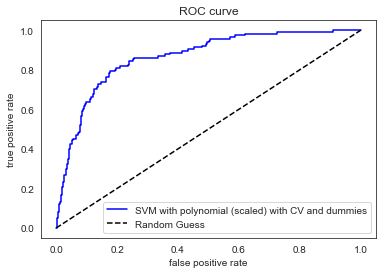

In [460]:
# ROC-AUC


decision_scores = clf_poly_ds.decision_function(x_svm_test_ds)
fpr, tpr, thres = roc_curve(y_svm_test_ds, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_svm_test_ds, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='SVM with polynomial (scaled) with CV and dummies')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

The AUC is highest at 86.5%. The accuracy rate is also highest at 88%. The precision is also high at 60% but a very low recall score at 21%.

# KNN with dummies

Text(0, 0.5, 'ErrTe')

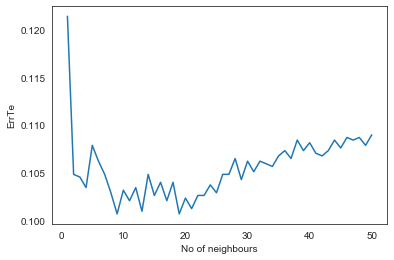

In [462]:
# Find the optimal K

KNNdata_ds = dataset.copy(deep=True)

#Splitting the data into Train and test
seed = 1
knn_train_ds, knn_test_ds = train_test_split(KNNdata_ds, train_size = 0.8, random_state = seed)
knn_train_ds.reset_index(inplace = True, drop = True)
knn_test_ds.reset_index(inplace = True, drop = True)

#Further dividing it into xtrain and ytrain
y_knn_train_ds = knn_train_ds["y"]
x_knn_train_ds = knn_train_ds.loc[:,knn_train_ds.columns!='y']

y_knn_test_ds = knn_test_ds["y"]
x_knn_test_ds = knn_test_ds.loc[:,knn_test_ds.columns!='y']

columns=x_knn_train_ds.columns


from sklearn.model_selection import KFold
kf = KFold(10, random_state = 1, shuffle = True)
kf.get_n_splits(x_knn_train_ds)

import numpy as np
import random
random.seed(1)
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

direction = y_knn_train_ds
# Cross validation
Kmax = 50
ErrCV = np.zeros((50, 10))
f = 0
for train_idx, test_idx in kf.split(x_knn_train_ds):
    
    #Split into pseudo training/test data
    X_train_knn_ds, y_train_knn_ds = x_knn_train_ds.loc[train_idx, :], direction[train_idx]
    X_test_knn_ds, y_test_knn_ds = x_knn_train_ds.loc[test_idx, :], direction[test_idx]
    
    #scale the pseudo train and test data
    sc = StandardScaler()
    X_train_knn_ds[numcol] = sc.fit_transform(X_train_knn_ds[numcol])
    X_test_knn_ds[numcol] = sc.transform(X_test_knn_ds[numcol])
    
    for kk in range(1, Kmax+1):
        kNN_ds = KNeighborsClassifier(n_neighbors=kk)
        kNN_ds.fit(X_train_knn_ds,y_train_knn_ds)
        y_pred_knn_ds = kNN_ds.predict(X_test_knn_ds)
        ErrCV[kk-1, f] = (y_pred_knn_ds != y_test_knn_ds).mean()
        
    f += 1

# Plot average CV error
sns.lineplot(x = np.arange(1, Kmax+1), y = ErrCV.mean(axis = 1))
plt.xlabel("No of neighbours")
plt.ylabel("ErrTe")

In [463]:
print("No of neighbours:", np.argmin(ErrCV.mean(axis = 1))+1)

No of neighbours: 9


In [465]:

# Scaling the data
sc = StandardScaler().fit(x_knn_train_ds[numcol])
x_knn_train_ds[numcol] = sc.fit_transform(x_knn_train_ds[numcol])
x_knn_test_ds[numcol] = sc.transform(x_knn_test_ds[numcol])

columns=x_knn_train_ds.columns

#fit the model to the whole dataset
seed = 1
kNN_sc_ds = KNeighborsClassifier(n_neighbors=9)
kNN_sc_ds.fit(x_knn_train_ds, y_knn_train_ds)
y_true_knn_ds, y_pred_knn_ds = y_knn_test_ds, kNN_sc_ds.predict(x_knn_test_ds)
confusion_matrix(y_true_knn_ds, y_pred_knn_ds)

array([[778,  12],
       [100,  15]])

In [466]:
print("Detailed classification report")
y_true_knn_ds, y_pred_knn_ds = y_knn_test_ds, kNN_sc_ds.predict(x_knn_test_ds)
print(classification_report(y_true_knn_ds, y_pred_knn_ds))

Detailed classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       790
           1       0.56      0.13      0.21       115

    accuracy                           0.88       905
   macro avg       0.72      0.56      0.57       905
weighted avg       0.84      0.88      0.84       905



In [467]:
#Evaluate the model
metrics1.loc['accuracy','KNN (with dummy) with CV'] = accuracy_score(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds)
metrics1.loc['precision','KNN (with dummy) with CV'] = precision_score(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds)
metrics1.loc['recall','KNN (with dummy) with CV'] = recall_score(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds)

#Confusion Matrix
CM = confusion_matrix(y_pred =  y_pred_knn_ds, y_true = y_true_knn_ds)
CMatrix(CM)

PREDICTION,0,1,Total
TRUE,,,
0,778,12,790
1,100,15,115
Total,878,27,905


Accuracy Rate: 0.876243093922652
Misclassification Rate: 0.12375690607734802
Precision Score: 0.5555555555555556
Recall Score: 0.13043478260869565


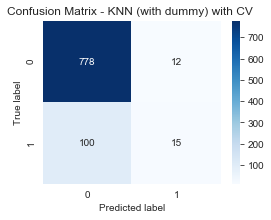

In [468]:
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - KNN (with dummy) with CV ");

print('Accuracy Rate:', accuracy_score(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds))
print('Misclassification Rate:', 1-accuracy_score(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds))
print('Precision Score:', precision_score(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds))
print('Recall Score:', recall_score(y_pred = y_pred_knn_ds, y_true = y_true_knn_ds))

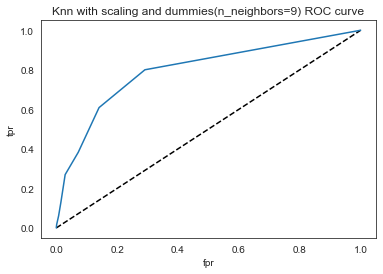

0.7957567418822236

In [471]:
y_pred_proba_ds = kNN_sc_ds.predict_proba(x_knn_test_ds)[:,1]
fpr, tpr, thresholds = roc_curve(y_true_knn_ds, y_pred_proba_ds)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN with scaling and dummies')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn with scaling and dummies(n_neighbors=9) ROC curve')
plt.show()

#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true_knn_ds,y_pred_proba_ds)

The AUC is highest at 79%. The accuracy rate is also highest at 87.6%. The precision is also high at 55.5% but a very low recall score at 13.04%.

In [472]:
metrics1

,SVM with polynomial kernel (with dummy) with CV,KNN (with dummy) with CV
accuracy,0.881768,0.876243
precision,0.6,0.555556
recall,0.208696,0.130435


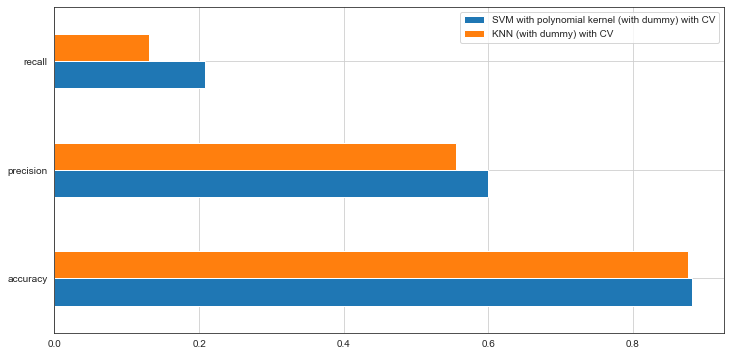

In [473]:
fig, ax = plt.subplots(figsize = (12,6))
metrics1.plot(kind = 'barh', ax = ax)
ax.grid()